In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector=inspect(engine)  # another way to get data from a db
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Msrmt = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(Station).first()
first_row.__dict__ 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x201f9ce3198>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [11]:
first_row = session.query(Msrmt).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x201f9ce3d68>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date =session.query(Msrmt.date).order_by(Msrmt.date.desc()).limit(1)

recent_date[0][0]
#print(type(recent_date))  TODO figure out how to convert this to

'2017-08-23'

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
yearago=dt.date(2017,8,23)-dt.timedelta(days=365)
print(f"Query date range: {yearago} to {recent_date[0][0]}")
# Perform a query to retrieve the data and precipitation scores.  Order the data by date and populate dataframe
last12mosrain_df =pd.DataFrame(session.query(Msrmt.date,Msrmt.prcp).filter(Msrmt.date >= yearago).order_by(Msrmt.date).all())

last12mosrain_df['date'] = pd.to_datetime(last12mosrain_df['date'])

last12mosrain_df

Query date range: 2016-08-23 to 2017-08-23


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [14]:
#set index to be the date
last12mosrain_df.set_index('date', inplace=True)

In [15]:
from dateutil.relativedelta import *
#create list for xaxis graph ticks
yearticks=[]
for i in range(13):
    #print(yearago+relativedelta(months=+i)) #testing output
    yearticks.append(yearago+relativedelta(months=+i))

2016-08-23
2016-09-23
2016-10-23
2016-11-23
2016-12-23
2017-01-23
2017-02-23
2017-03-23
2017-04-23
2017-05-23
2017-06-23
2017-07-23
2017-08-23


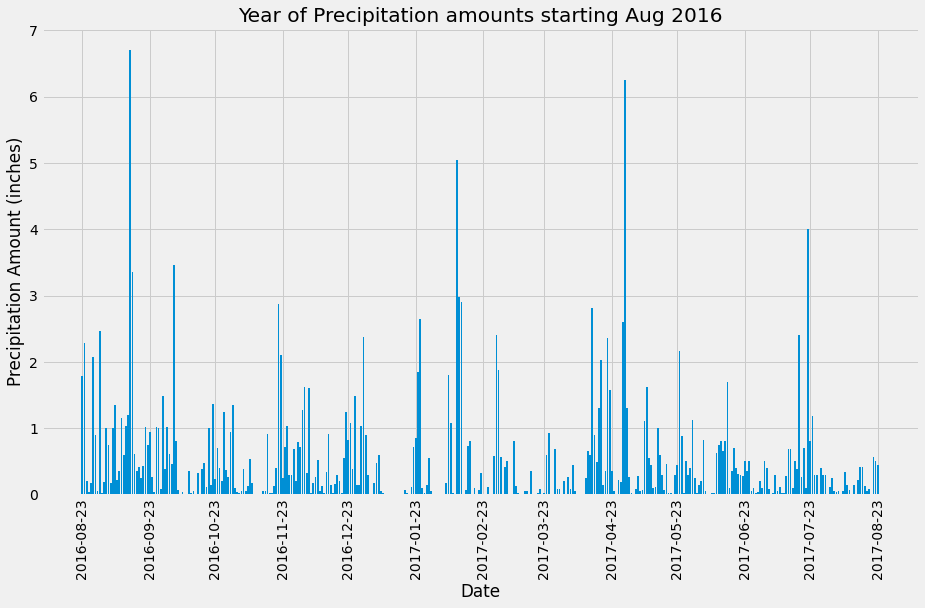

In [16]:
# Use Pandas Plotting with Matplotlib to plot the 
#plot = datalast12mosrain_df.plot(kind='bar')
plt.figure(figsize=(14,8))
#plot = plt.bar(x=last12mosrain_df.index, height=last12mosrain_df.prcp)
plt.bar(x=last12mosrain_df.index, height=last12mosrain_df.prcp)

plt.title('Year of Precipitation amounts starting Aug 2016')
plt.xlabel('Date')
plt.ylabel('Precipitation Amount (inches)')
plt.xticks(yearticks, rotation="vertical")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last12mosrain_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# last12mos_df =pd.DataFrame(session.execute('select longitude,name,elevation,latitude, m.station from measurement m,'))
# last12mos_df.head()

# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [23]:
# Close Session
session.close()